In [5]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#importing datasets
df = pd.read_csv('menu.csv')

In [7]:
df.shape

(260, 24)

In [8]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [11]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

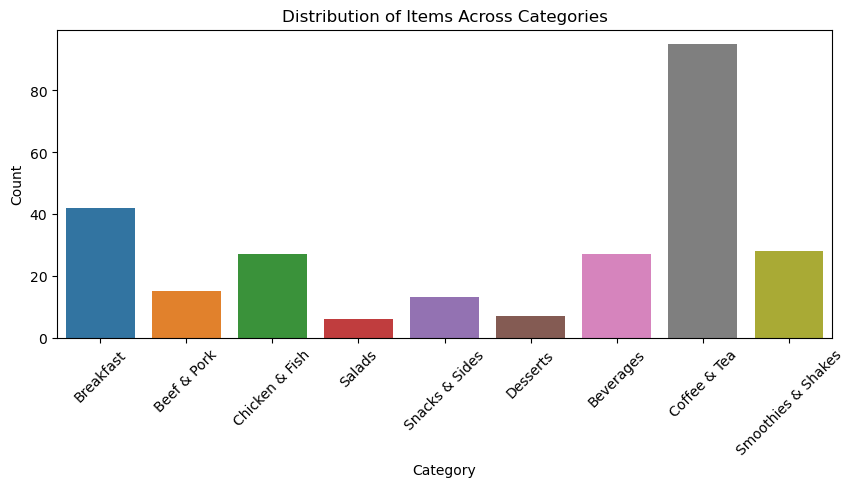

In [13]:
# plotting the category count
fig, ax = plt.subplots(figsize = (10, 4))
sns.countplot(data= df, x='Category', ax=ax)
plt.title('Distribution of Items Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


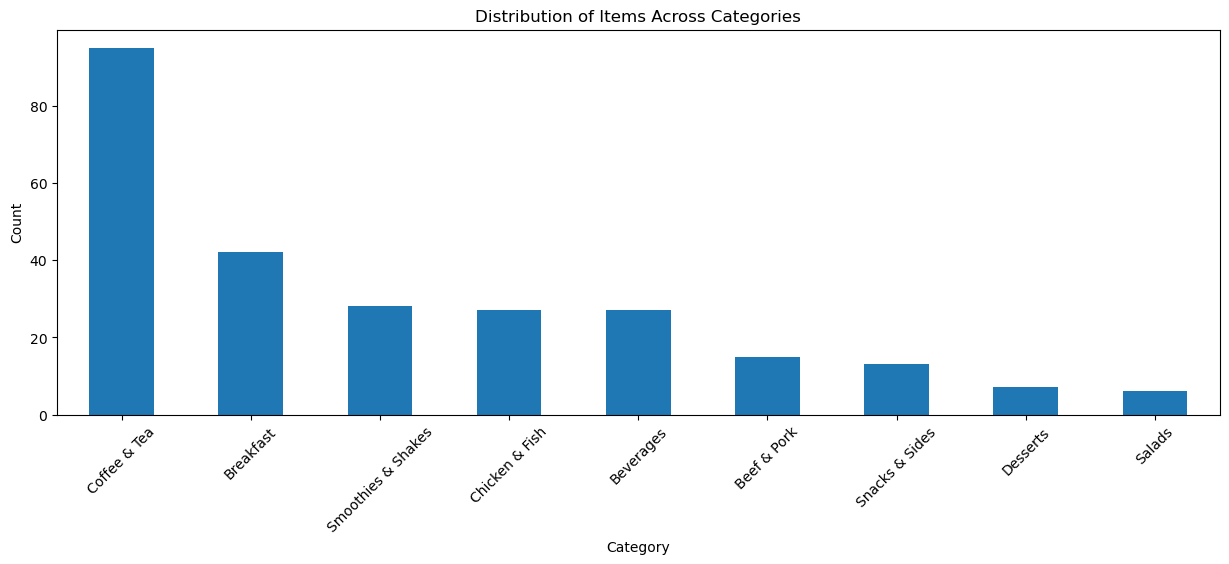

In [15]:
category_counts = df['Category'].value_counts()

# Plotting directly using pandas plot
plt.figure(figsize=(15, 5))
category_counts.plot(kind='bar')
plt.title('Distribution of Items Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()